<a href="https://colab.research.google.com/github/Seyjuti8884/EDA/blob/main/Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAR SALES DATASET

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as pyp
import seaborn as sns


In [9]:
df = pd.read_csv("Car Sale.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [11]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [12]:
df.fillna("0", inplace = True)

In [13]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


1. Average Selling Price for Each Dealer

In [14]:
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average Selling Price by Dealer:")
print(average_price_by_dealer)


Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.88

2. Car Brand with the Highest Price Variation

In [15]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
highest_variation_brand = price_variation_by_brand.idxmax()
print("Car Brand with the Highest Price Variation:", highest_variation_brand)
print("Price Variation for the Brand:", price_variation_by_brand[highest_variation_brand])


Car Brand with the Highest Price Variation: Lincoln
Price Variation for the Brand: 19658.050211265567


3. Distribution of Car Prices for Each Transmission Type

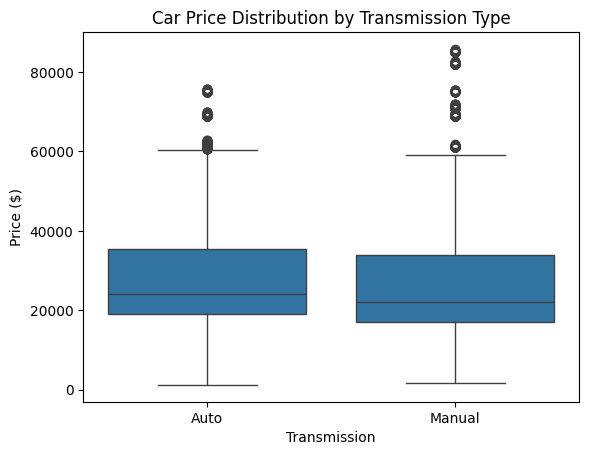

In [17]:
sns.boxplot(x='Transmission', y='Price ($)', data=df)
pyp.title("Car Price Distribution by Transmission Type")
pyp.show()


4. Distribution of Car Prices Across Different Regions

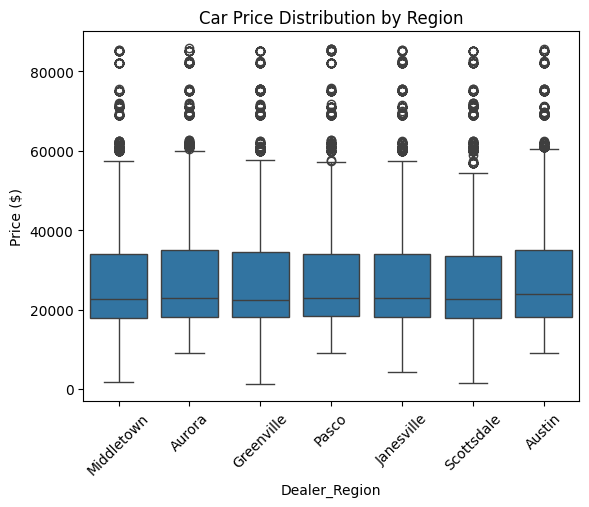

In [18]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
pyp.title("Car Price Distribution by Region")
pyp.xticks(rotation=45)
pyp.show()


5. Distribution of Cars Based on Body Styles

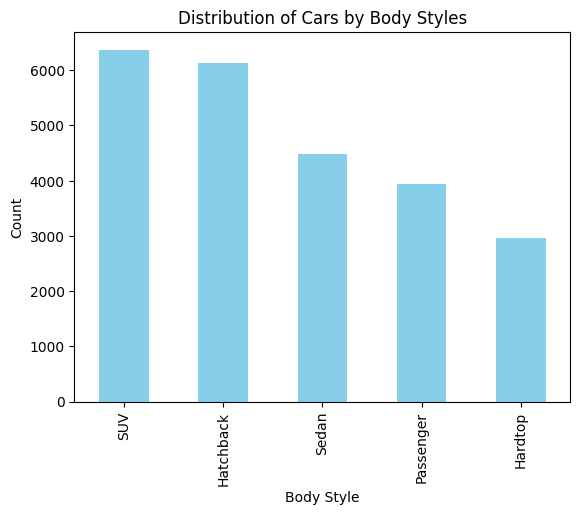

In [19]:
body_style_counts = df['Body Style'].value_counts()
body_style_counts.plot(kind='bar', color='skyblue')
pyp.title("Distribution of Cars by Body Styles")
pyp.xlabel("Body Style")
pyp.ylabel("Count")
pyp.show()


6. Average Selling Price by Gender and Annual Income

In [20]:
avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print("Average Selling Price by Gender and Annual Income Bracket:")
print(avg_price_by_gender_income)


Average Selling Price by Gender and Annual Income Bracket:
Gender  Annual Income          
Female  (-1109.92, 2248064.0]      28218.888484
        (2248064.0, 4486048.0]     30183.052980
        (4486048.0, 6724032.0]     28318.875000
        (6724032.0, 8962016.0]              NaN
        (8962016.0, 11200000.0]             NaN
Male    (-1109.92, 2248064.0]      27996.376891
        (2248064.0, 4486048.0]     29021.878710
        (4486048.0, 6724032.0]     27520.139535
        (6724032.0, 8962016.0]     40333.333333
        (8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


<ipython-input-20-e562dde18aaa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()


7. Car Prices by Region and Cars Sold Variation

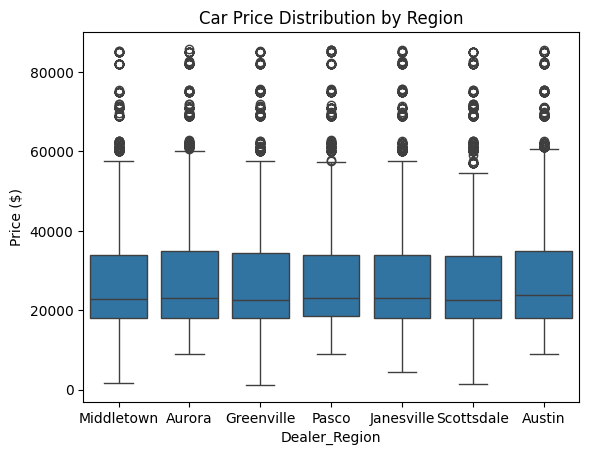

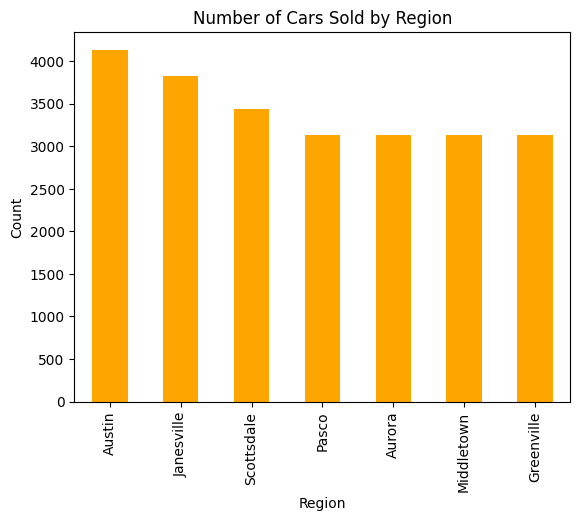

In [24]:
# Car price distribution by region
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
pyp.title("Car Price Distribution by Region")
pyp.show()

# Cars sold variation by region
cars_sold_by_region = df['Dealer_Region'].value_counts()
cars_sold_by_region.plot(kind='bar', color='orange')
pyp.title("Number of Cars Sold by Region")
pyp.xlabel("Region")
pyp.ylabel("Count")
pyp.show()


8. Average Price Difference by Engine Size

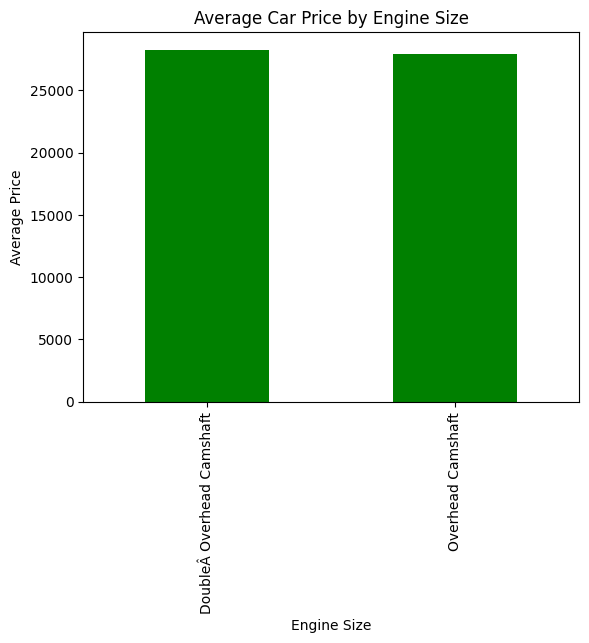

In [25]:
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
avg_price_by_engine.plot(kind='bar', color='green')
pyp.title("Average Car Price by Engine Size")
pyp.xlabel("Engine Size")
pyp.ylabel("Average Price")
pyp.show()


9. Car Prices by Annual Income Bracket

<ipython-input-26-711a21239ef7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()


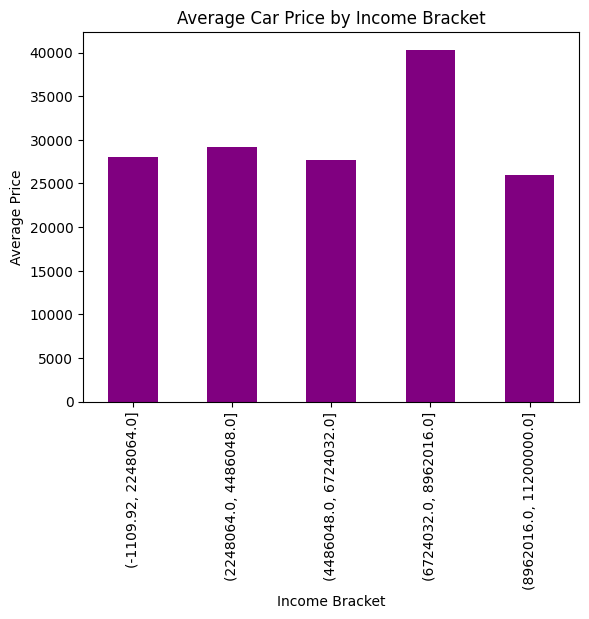

In [26]:
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=5)
avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()

avg_price_by_income_bracket.plot(kind='bar', color='purple')
pyp.title("Average Car Price by Income Bracket")
pyp.xlabel("Income Bracket")
pyp.ylabel("Average Price")
pyp.show()


10. Top 5 Car Models by Sales and Price Distribution

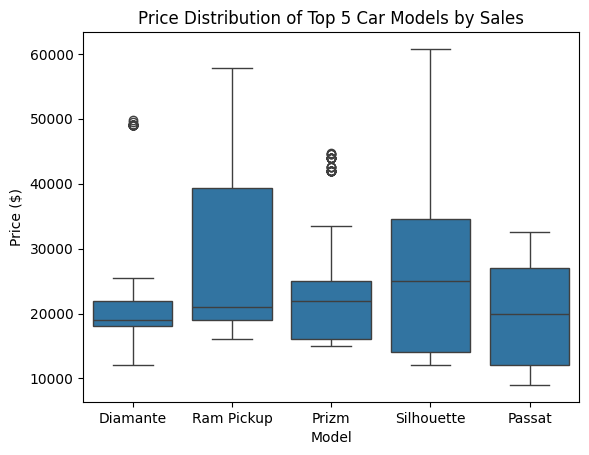

In [27]:
top_models = df['Model'].value_counts().head(5)
top_models_data = df[df['Model'].isin(top_models.index)]

sns.boxplot(x='Model', y='Price ($)', data=top_models_data)
pyp.title("Price Distribution of Top 5 Car Models by Sales")
pyp.show()


11. Car Price by Engine Size and Color

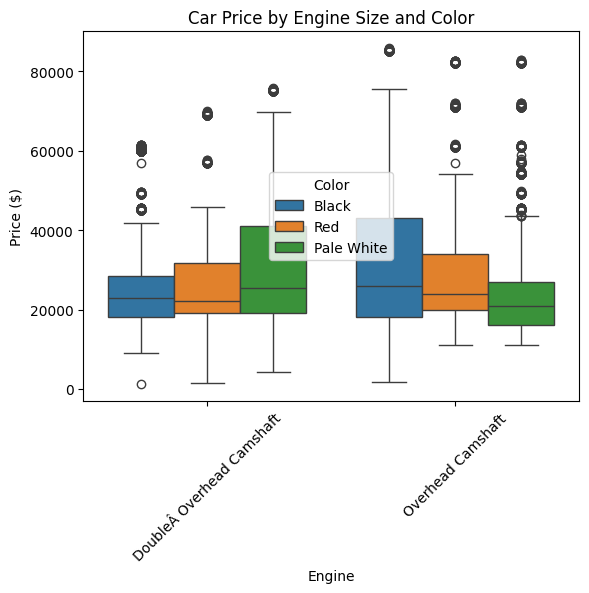

In [28]:
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
pyp.title("Car Price by Engine Size and Color")
pyp.xticks(rotation=45)
pyp.show()


12. Seasonal Trend in Car Sales by Date

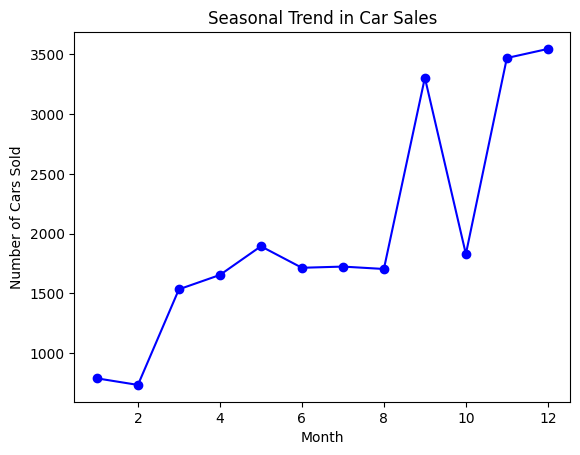

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Price ($)'].count()

sales_by_month.plot(kind='line', marker='o', color='blue')
pyp.title("Seasonal Trend in Car Sales")
pyp.xlabel("Month")
pyp.ylabel("Number of Cars Sold")
pyp.show()


13. Price Distribution by Body Style and Transmission

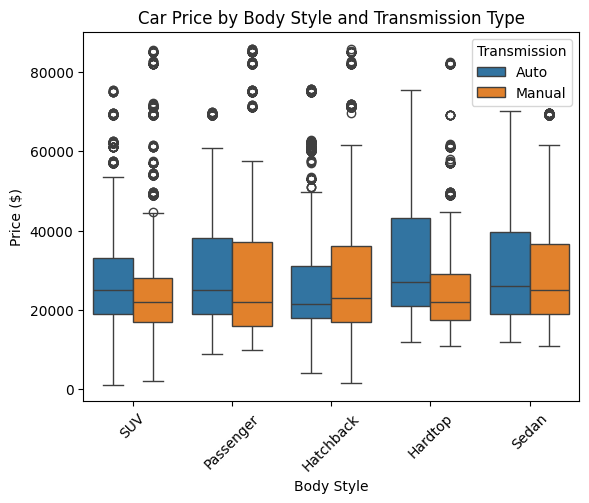

In [30]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
pyp.title("Car Price by Body Style and Transmission Type")
pyp.xticks(rotation=45)
pyp.show()


14. Correlation Between Price, Engine Size, and Annual Income

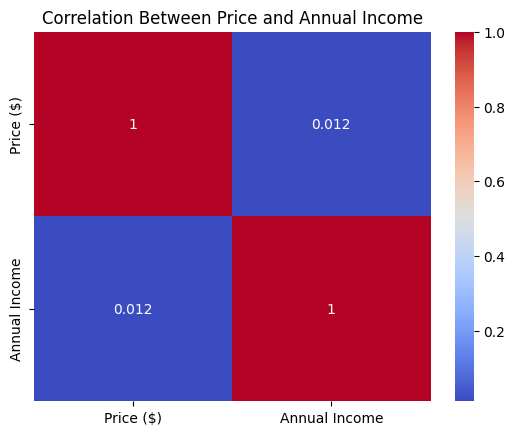

In [32]:
numeric_cols = df[['Price ($)', 'Annual Income']]  # Exclude Engine
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
pyp.title("Correlation Between Price and Annual Income")
pyp.show()


15. Average Price by Car Models and Engine Types

In [33]:
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("Average Price by Car Models and Engine Types:")
print(avg_price_by_model_engine)


Average Price by Car Models and Engine Types:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64
